In [29]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("ORGANICS.csv")

In [30]:
print(df.shape)
df = df.fillna(df.median())
df.info()

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [31]:
x=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [32]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_score = tree.predict(x_test)

In [34]:
print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))

0.8050097495125244
0.41605839416058393
0.66796875
0.3989796849572045
0.512743628185907
0.6741848809345623
0.41645486887399913


[[0.35933806 0.64066194]
 [0.90898528 0.09101472]
 [0.90898528 0.09101472]
 ...
 [0.8115279  0.1884721 ]
 [0.76493506 0.23506494]
 [0.56079404 0.43920596]]
[0.64066194 0.09101472 0.09101472 ... 0.1884721  0.23506494 0.43920596]


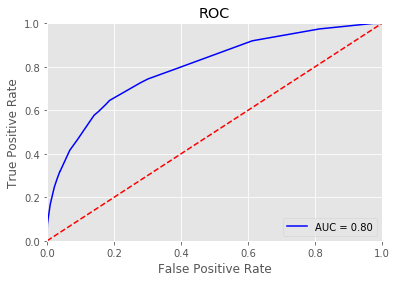

In [35]:
probs = tree.predict_proba(x_test)
print(probs)
preds = probs[:,1]
print(preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
tree_balanced = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, class_weight='balanced')
tree_balanced.fit(x_train, y_train)

y_score = tree_balanced.predict(x_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))

0.7343632818359082
0.383581864284147
0.698905109489051
0.4738144329896907
0.56475792578029
0.7224368270917284
0.39859145065001644
